### Dimentionality Reduction

In [2]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [7]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
U, s, Vt.T

(array([[-0.18623814, -0.14896282,  0.01772286, ...,  0.05375531,
         -0.21815552,  0.09822991],
        [ 0.01180778,  0.12490007, -0.19760878, ..., -0.02599936,
          0.08315555, -0.07694387],
        [-0.17346216, -0.12778066, -0.00925174, ...,  0.24892819,
          0.21661298,  0.0360244 ],
        ...,
        [ 0.09853295,  0.11424185,  0.21228513, ...,  0.93945697,
         -0.03636283, -0.01657407],
        [-0.17176825,  0.01291816,  0.25979975, ..., -0.05001952,
          0.90462125,  0.01171474],
        [ 0.1008287 ,  0.08058277, -0.00763055, ..., -0.00924933,
          0.01895312,  0.98684662]]),
 array([6.77645005, 2.82403671, 0.78116597]),
 array([[ 0.93636116, -0.34027485, -0.08626012],
        [ 0.29854881,  0.90119108, -0.31420255],
        [ 0.18465208,  0.2684542 ,  0.94542898]]))

In [10]:
W2 = Vt.T[:, :2]
X2D_using_svd = X_centered.dot(W2)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D_using_pca = pca.fit_transform(X_centered)
np.allclose(X2D_using_pca, -X2D_using_svd)

True

In [29]:
pca.explained_variance_ratio_.sum()

0.988804464429311

In [37]:
pca_with_ratio = PCA(n_components=0.95)
pca_with_ratio.fit_transform(X_centered)
pca_with_ratio.explained_variance_ratio_.sum()

0.988804464429311

### PCA for Compression

In [38]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [39]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.79085038e-02, 7.14447647e-02, 6.14507328e-02, 5.42183485e-02,
       4.91071200e-02, 4.30708507e-02, 3.27267335e-02, 2.89335784e-02,
       2.76194491e-02, 2.33826899e-02, 2.10436239e-02, 2.03975769e-02,
       1.70721508e-02, 1.69537023e-02, 1.57918508e-02, 1.48734235e-02,
       1.31712211e-02, 1.27779818e-02, 1.18681165e-02, 1.15093354e-02,
       1.06463066e-02, 1.01173602e-02, 9.60168519e-03, 9.11011638e-03,
       8.78738255e-03, 8.35889257e-03, 8.05382077e-03, 7.85296069e-03,
       7.38460537e-03, 6.88145500e-03, 6.56435255e-03, 6.44727312e-03,
       6.00699351e-03, 5.83802398e-03, 5.67574511e-03, 5.42268805e-03,
       5.04010291e-03, 4.84444994e-03, 4.79021418e-03, 4.64612075e-03,
       4.54282479e-03, 4.43236418e-03, 4.17088768e-03, 3.95142029e-03,
       3.81962592e-03, 3.75427884e-03, 3.60751989e-03, 3.49972441e-03,
       3.38615284e-03, 3.20193429e-03, 3.16097432e-03, 3.11042073e-03,
       2.95910465e-03, 2.87179988e-03, 2.81085759e-03, 2.69226182e-03,
      

In [43]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [52]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
X_reduced.shape, X_train.shape

((52500, 154), (52500, 784))

In [48]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5,1,'Compressed')

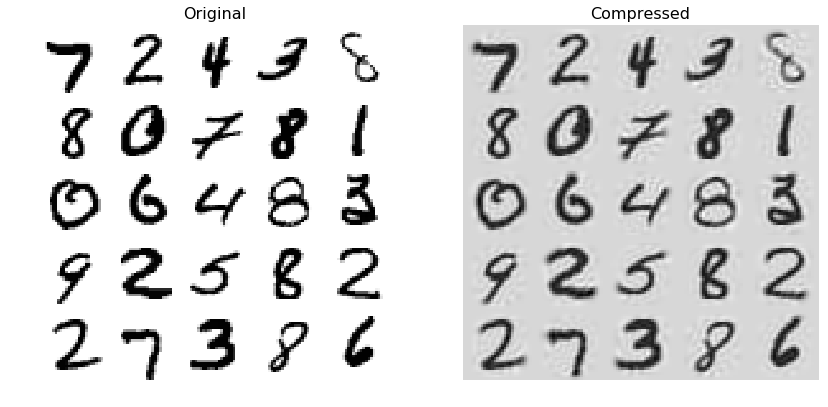

In [50]:
plt.figure(figsize=(14, 8))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [53]:
from sklearn.decomposition import IncrementalPCA

inc_pca = IncrementalPCA(n_components=d)

In [54]:
for X_batch in np.array_split(X_train, 100):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_inc_reduced = inc_pca.transform(X_train)

....................................................................................................

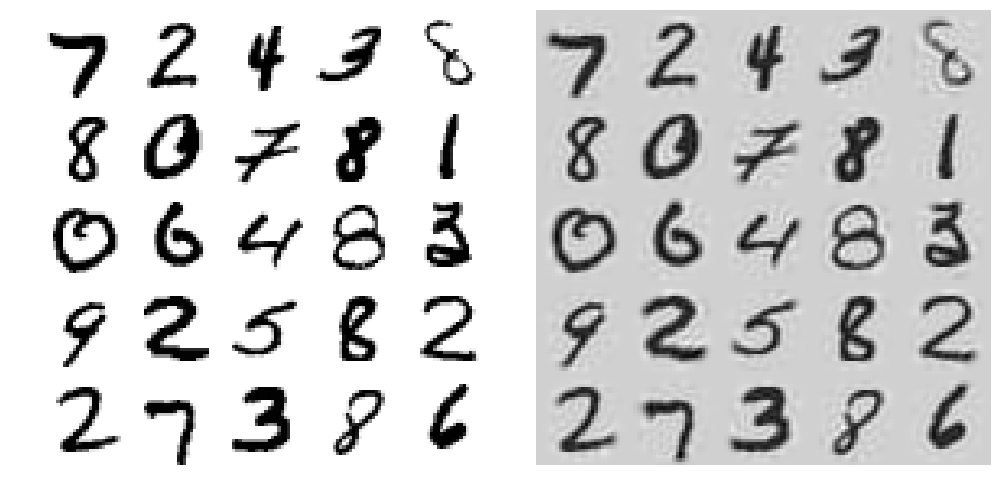

In [56]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_inc_reduced)


plt.figure(figsize=(14, 8))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [57]:
from sklearn.decomposition import RandomizedPCA

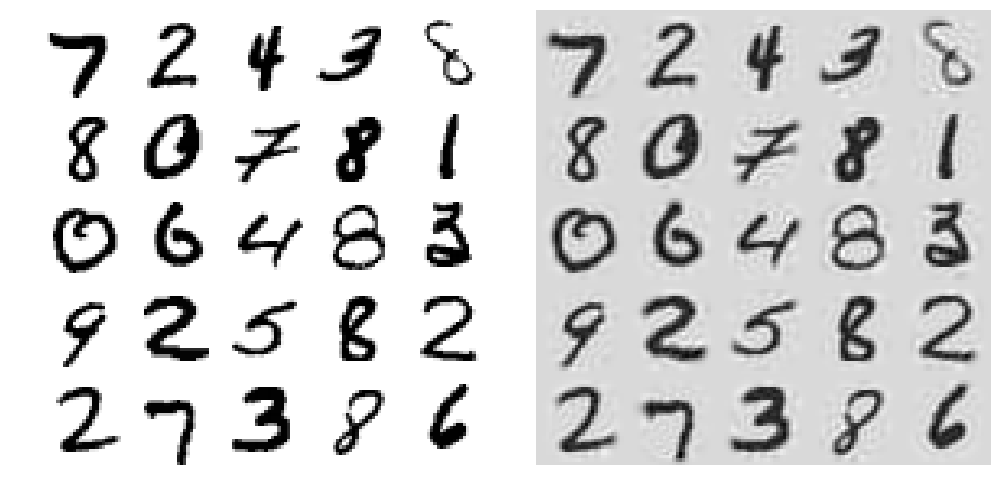

In [59]:
rnd_pca = RandomizedPCA(n_components=d)
X_rnd_reduced = rnd_pca.fit_transform(X_train)
X_recovered_rnd_pca = rnd_pca.inverse_transform(X_rnd_reduced)

plt.figure(figsize=(14, 8))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_rnd_pca[::2100])
plt.tight_layout()